# Statistical Analysis

Analyse our transfer learning (TL) results with Python. The objective is to evaluate different TL methods' performance and to find out the statistical conclusion based on these numeric results.

## Load Required Libraries

In [56]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

## Set Environment

In [4]:
root_path = '/Users/fangyijiewang/Desktop/PhD/Autumn_Year_1/'

In [5]:
folder = 'numeric_data/'

## Load Data

In [57]:
mobilenet_test_file = 'test_diff_per_data.csv'

In [58]:
mobilenet_test_df = pd.read_csv(root_path+folder+mobilenet_test_file)
mobilenet_test_df.head()

,U-Net Backbone,Times,Train Size,Pixel Accuracy,Dice Score,Mean IoU
0,None_31MM,1,10per,93.950,88.901651,80.166435
1,None_31MM,2,10per,92.609,87.700200,78.471600
2,None_31MM,3,10per,91.465,86.315500,76.198900
3,None_31MM,4,10per,92.588,88.492100,79.530100
4,None_31MM,5,30per,94.480,91.256905,83.995742


In [59]:
mobilenet_test_df.shape

(48, 6)

In [60]:
mobilenet_test_df.dtypes

U-Net Backbone     object
Times               int64
Train Size         object
Pixel Accuracy    float64
Dice Score        float64
Mean IoU          float64
dtype: object

## Statistical Analysis

In [77]:
test_dice_df = mobilenet_test_df.iloc[:,[0,1,4]]
test_dice_df.head()

,U-Net Backbone,Times,Dice Score
0,None_31MM,1,88.901651
1,None_31MM,2,87.700200
2,None_31MM,3,86.315500
3,None_31MM,4,88.492100
4,None_31MM,5,91.256905


In [71]:
test_dice_df.shape

(48, 3)

In [82]:
stat_table = pd.pivot_table(test_dice_df, 
                       values='Dice Score',
                       index=['U-Net Backbone'],
                       columns=['Times'],
                       aggfunc=np.average)
stat_table

Times,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
U-Net Backbone,,,,,,,,,,,,,,,,
MobileNet_2_22MM,69.912500,72.085600,81.2733,82.397000,73.017000,74.2545,84.1975,88.2863,95.421000,95.238700,89.8907,95.1214,96.8572,96.0443,96.0570,95.2437
MobileNet_4_4MM,92.190160,92.789192,90.7076,92.319572,94.020970,93.5553,94.6654,94.9525,95.661150,95.103027,95.0830,94.7703,96.1313,96.9583,96.1608,96.1079
None_31MM,88.901651,87.700200,86.3155,88.492100,91.256905,93.8231,93.3811,93.1879,94.747514,94.608000,94.2877,94.9949,94.7475,95.9235,96.1550,95.4225


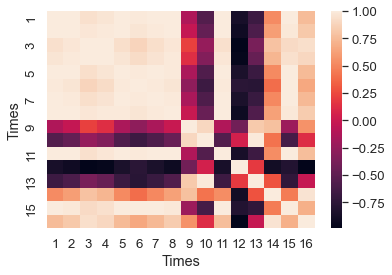

In [154]:
sns.heatmap(stat_table.corr(), cmap=None, annot=None)
plt.show()

In [148]:
t1 = stat_table[0:1].squeeze().tolist()
t2 = stat_table[1:2].squeeze().tolist()

In [149]:
print(f'{stat_table[0:1].index[0]} : {stat_table[1:2].index[0]}')
stats.ttest_ind(t1, t2)

MobileNet_2_22MM : MobileNet_4_4MM


Ttest_indResult(statistic=-3.1261812198854626, pvalue=0.003914103861465482)

In [150]:
t1 = stat_table[0:1].squeeze().tolist()
t2 = stat_table[2:3].squeeze().tolist()

In [151]:
print(f'{stat_table[0:1].index[0]} : {stat_table[2:3].index[0]}')
stats.ttest_ind(t1, t2)

MobileNet_2_22MM : None_31MM


Ttest_indResult(statistic=-2.368275336434823, pvalue=0.024511751550778654)

In [152]:
t1 = stat_table[1:2].squeeze().tolist()
t2 = stat_table[2:3].squeeze().tolist()

In [153]:
print(f'{stat_table[1:2].index[0]} : {stat_table[2:3].index[0]}')
stats.ttest_ind(t1, t2)

MobileNet_4_4MM : None_31MM


Ttest_indResult(statistic=1.8817014145384559, pvalue=0.06961117900042713)

## Results Visualization

In [74]:
mobilenet_test_df.iloc[:,0:4].head()

,U-Net Backbone,Times,Train Size,Pixel Accuracy
0,None_31MM,1,10per,93.950
1,None_31MM,2,10per,92.609
2,None_31MM,3,10per,91.465
3,None_31MM,4,10per,92.588
4,None_31MM,5,30per,94.480


In [75]:
mobilenet_test_df.columns

Index(['U-Net Backbone', 'Times', 'Train Size', 'Pixel Accuracy', 'Dice Score',
       'Mean IoU'],
      dtype='object')

In [12]:
colors = ["#807fff", "#fd7f82", "#84a97e"]

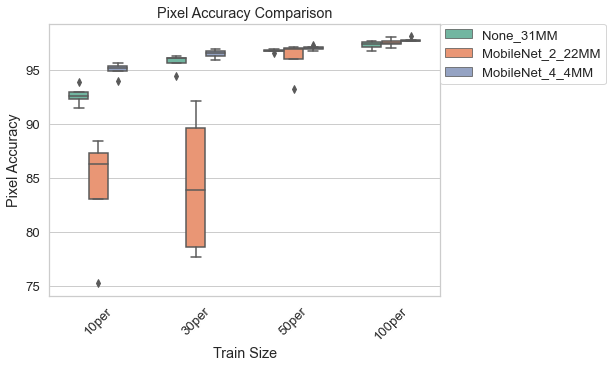

In [157]:
plt.figure(figsize=(7,5))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

g = sns.boxplot(data=mobilenet_test_df,
                x='Train Size', 
                y='Pixel Accuracy', 
                hue='U-Net Backbone', 
                width=0.6,
                palette='Set2'
               )

plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)
plt.title('Pixel Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

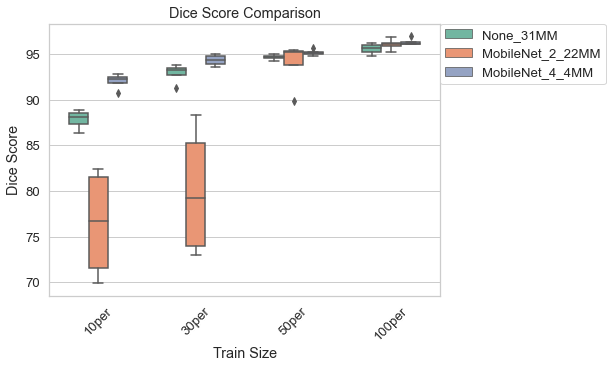

In [158]:
plt.figure(figsize=(7,5))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

g = sns.boxplot(data=mobilenet_test_df,
                x='Train Size', 
                y='Dice Score', 
                hue='U-Net Backbone', 
                width=0.6,
                palette='Set2')

plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)
plt.title('Dice Score Comparison')
plt.xticks(rotation=45)
plt.show()

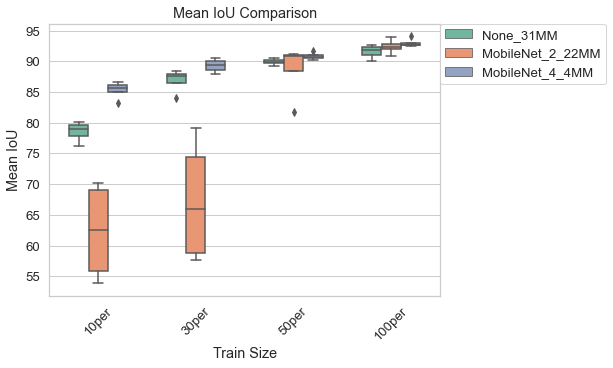

In [159]:
plt.figure(figsize=(7,5))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

g = sns.boxplot(data=mobilenet_test_df,
                x='Train Size', 
                y='Mean IoU', 
                hue='U-Net Backbone', 
                width=0.6,
                palette='Set2')

plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)
plt.title('Mean IoU Comparison')
plt.xticks(rotation=45)
plt.show()